# trial2trial_Variance

## Imports

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import describe
import datetime
from datetime import timedelta as timedelta
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
import sklearn.utils as sku
from scipy import signal
import os, sys
sys.path.append( '/home/ugrads/c/clearloveyanzhen/CufflessBP/bioz_processing' )
import sicong_util as su
import sicong_duck_path as sp
import sicong_duck_path as sdp
plt.rcParams.update({'font.size': 13})
import seaborn as sns
import scipy as sp # for signal processing
from scipy import signal
from scipy.spatial import distance
import IPython.display as ipd
import random
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader , TensorDataset
import torch.autograd as autograd
from torch import Tensor
import shap
from sklearn import svm
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, plot_confusion_matrix, confusion_matrix, matthews_corrcoef
from sklearn.linear_model import LogisticRegression, LinearRegression
import sklearn.utils as sku
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


## Load Data

In [2]:
selected_trials=['10_37_49', '10_49_54', '11_07_35', '11_16_22']
# selected_trials=['13_55_53', '13_46_18', '13_29_26', '13_20_26']
selected_index=[3,3]
X_train = np.load(f'batched_data/X_file 75A Morph s6 {selected_trials[selected_index[0]]}.npy')
# y_train = np.load('batched_data/y_file 75A Morph s6 11_07_35.npy')
y_train=np.zeros(len(X_train))

X_test = np.load(f'batched_data/X_file 75A Morph s6 {selected_trials[selected_index[1]]}.npy')
# y_test = np.load('batched_data/y_file 75A Morph s6 11_16_22.npy')
y_test=np.ones(len(X_test))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(189, 69) (189,) (189, 69) (189,)


In [3]:
np.concatenate((X_train, X_test), axis=0).shape, np.concatenate((y_train, y_test), axis=0).shape

((378, 69), (378,))

In [4]:
X, y = sku.resample(np.concatenate((X_train[:100], X_test[100:]), axis=0), np.concatenate((y_train[:100], y_test[100:]), axis=0))
mm=MinMaxScaler()
X=mm.fit_transform(X)
print(X.shape, y.shape)

(189, 69) (189,)


phi corr with mean and std  0.756; 0.140
f1_score with mean and std  0.869; 0.077
Session06 11_16_22 vs. 11_16_22
xgb with Average=0.756 with STD=0.140


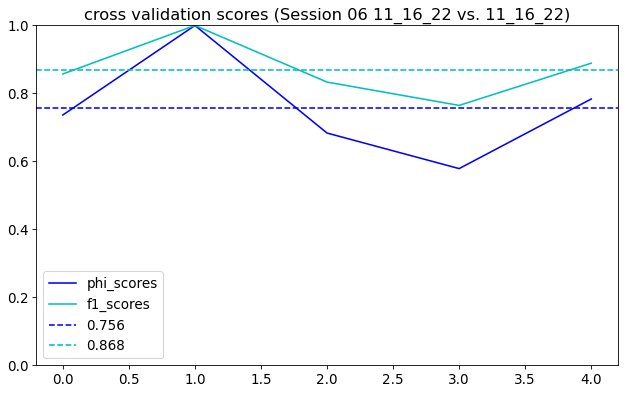

In [5]:
xgb = xgboost.XGBClassifier(objective='binary:logistic', eval_metric='logloss', max_depth=1, use_label_encoder=False)
plt.figure(233, figsize=(10, 6), dpi=75)
skf=StratifiedKFold(n_splits=5)
phi_scores=[]
f1_scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    phi_scores.append(matthews_corrcoef(y_pred, y_test))
    f1_scores.append(f1_score(y_pred, y_test))
phi_scores = np.array(phi_scores)
f1_scores = np.array(f1_scores)
print(f'phi corr with mean and std  {np.mean(phi_scores):.3f}; {np.std(phi_scores):.3f}')
print(f'f1_score with mean and std  {np.mean(f1_scores):.3f}; {np.std(f1_scores):.3f}')
plt.title(f'cross validation scores (Session 06 {selected_trials[selected_index[0]]} vs. {selected_trials[selected_index[1]]})')
print(f'Session06 {selected_trials[selected_index[0]]} vs. {selected_trials[selected_index[1]]}')
plt.plot(phi_scores, label='phi_scores', color='b')
plt.plot(f1_scores, label='f1_scores', color='c')
plt.axhline(np.mean(phi_scores), label=str(np.mean(phi_scores))[:5], linestyle='--', color='b')
plt.axhline(np.mean(f1_scores), label=str(np.mean(f1_scores))[:5], linestyle='--', color='c')
plt.legend()
plt.ylim([0,1])
print(f'xgb with Average={np.mean(phi_scores):.3f} with STD={np.std(phi_scores):.3f}')

## Covariate Shift Analysis

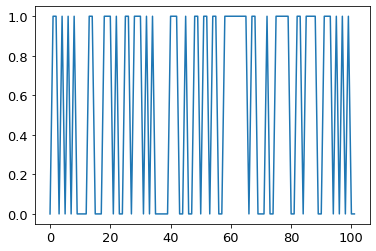

In [233]:
plt.plot(y)